# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек  
Выполнил студент группы 9382 Русинов Дмитрий, вариант 81

## Цель работы
Формирование представления об аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения
**Бинарный метод возведения числа в степень**  
Этот метод используется для возведения числа в натуральную степень. Рассматриваются все биты степени (слева направо), не учитывая первый бит, к возводимому в степень числу применяются следующие операции: число возводится в квадрат и умножается на исходное число, если бит равен 1, число возводится в квадрат, если бит равен 0. Количество операций умножения в бинарном методе равно: $\lambda(n) + \nu(n) - 1$, где $\lambda(n) = \lfloor log_2 n \rfloor, \ \nu(n)$ - количество единиц в двоичной записи числа

**Метод множителей возведения числа в в степень**  
Этот метод используется для возведения числа в натуральную степень $n$.
Если степень простая, то возводим число в степень $n-1$, а после домножаем на исходное число. Иначе раскладываем степень на произведение двух чисел, где одно из них - наименьший простой множитель числа $n$. После этого возводим число в степень первого составного числа, затем в степень второго числа.

**Аддитивной цепочкой** для $n \in N$ называется последовательность натуральных чисел $a_0 = 1, a_1, a_2, \ldots , a_m = n$, где $a_i = a_j + a_k$, $k \le j < i$, $\forall  i = 1..m$. Каждый элемент образован сложением любых двух предыдущих элементов. Количество элементов в цепочке - длина аддитивной цепочки.

**Теорема Брауэра**  
Для некоторого числа $k < log_2 (log_2 n)$ верно: $l(n) < (1+k^{-1}) \cdot \lceil log_2 n \rceil + 2^{k-1} - k + 2$.  
Если $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, то:
* Следствие 1: $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$
* Следствие 2: Одна из лучших верхних оценок длины аддитивной цепочки имеет представление: $\lambda(n)(1 + \frac{1}{\lambda(\lambda(n))} + \frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n)) ^ 2})$

**Алгоритм Яо**   
Данный алгоритм необходим для расчета аддитивной цепочки для заданного числа $n \in N$. Пусть есть два некоторых числа $ n,k $, тогда $n$ можно будет представить как $2^{ik} * c_i + \ldots + 2^{k} * c_1 + c_0$, где $c_i = 0$.

Функция $d(z)$ - сумма чисел $2^{ik}$, где для любых $i$ верно, что $c_i = z$.
Аддитивная цепочка Яо начинается с последовательности степеней двойки $1, 2, 4, 8, \ldots. 2^{\lambda(n)}$, вычисляется $d(z) \forall z \in \{1, 2, \ldots, 2 ^ {k-1} \}$, такие что $d(z) \neq 0$.

В конечном итоге $n = d(1) + 2 * d(2) + 3 * d(3) + \ldots + (2^{k}-1) * d(2^{k} - 1)$

**Звёздная цепочка**  
Это аддитивная цепочка, которая была получена с использованием правила: элемент $a_i$ является суммой элемента $a_{i-1}$ и элемента $a_k$, где $0 \leq k \leq i-1$, $a_i = a_{i-1} + a_k$. Обозначение звездной цепочки - $l^*(n)$.

Для минимальной звездной цепочки верно, что $l^*(n) \geq l(n)$. Для каждой звездной цепочки существует вектор индексов, состоящий из натуральных чисел, где элементы являются индексами элементов, которые необходимо сложить с предыдущим элементом звездной цепочки. По формуле $a_i = a_{i-1} + a_k$, каждый элемент вектора индексов является $k$.

**Алгоритм дробления вектора индексов**  
Данный алгоритм необходим для нахождения минимальной звездной цепочки для заданного числа $n \in N$.

Необходимо рассмотреть аддитивные цепочки длины $m$: $\underline{l}(n) \leq m \leq \overline{l}(n)$, где $\underline{l}(n) = \lfloor lbn \rfloor, \overline{l}(n) = \lambda(n) + v(n) - 1$.

Затем выбираем такое $q \in N$, что $1 \leq q \leq m - 1$. В нашем случае $q = \frac{m}{2}$.
$q$ - длина неизменной части вектора индексов.  
Создаем вектор индексов размера $q$, его необходимо дополнить до размера m. Это можно сделать двумя способами:  
    1. Дополнить минимальным вектором индексов размера $m - q$, состоящим только из 1.  
    2. Дополнить максимальным вектором индексов размера $m - q$, где элементы будут начинаться с $q + 1$.  
Имея два таких вектора, мы можем получить $a_{max}$ и $a_{min}$, если один из них равен n, то алгоритм заканчивает свою работу.  

Если же $n \in [a_{min}, a_{max}]$, то необходимо уменьшать изменяемую часть вектора индексов до тех пор, пока она не станет минимальной (состоящей только из единиц), либо последней элемент, полученной звездной цепочки из текущего вектора индексов не станет равным n.  
В ином случае необходимо уменьшить фиксированный вектор индексов размера $q$ и продолжить перебор изменяемой части с самого начала.
    
**Гипотеза Шольца - Брауэра**  
$l ^ * (2 ^  n- 1) \leq l ^ * (n) + n - 1$

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
Применить бинарный метод и метод множителей для $x ^ n$, где $n \ge 30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n > 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

Проверить следствие 1 теоремы Брауэра для $n \in 1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

Проверить гипотезу Шольца–Брауэра для $1 < n \leq 10$ на алгоритме дробления вектора индексов. Сделать выводы.


## Бинарный метод и метод множителей  
Были реализованы бинарный метод и метод множителей, реализации представлены ниже.

In [16]:
def getBinaryRecord(number: int) -> str:
    return bin(number)[2::]


def binaryMethod(number: int, toPower: int) -> tuple:
    binaryPower = getBinaryRecord(toPower)
    countOperations = 0
    currentPower = 1
    currentNumber = number
    listOfPowers = list()
    
    for symbol in binaryPower[1:]:
        
        if symbol == '1':
            currentNumber = currentNumber * currentNumber * number
            currentPower = currentPower * 2 + 1
            countOperations += 2
            
        elif symbol == '0':
            currentNumber *= currentNumber
            currentPower *= 2
            countOperations += 1
        
        listOfPowers.append(currentPower)
            
    return currentNumber, countOperations, listOfPowers

In [17]:
def getMinimalMultiplier(number: int) -> int:
    if not number % 2:
        return 2
    
    delimiter = 3
    while number % delimiter and delimiter * delimiter <= number:
        delimiter += 2
        
    if delimiter * delimiter <= number:
        return delimiter
    return number


def multipliersMethod(number: int, toPower: int):
    minimalMultiplier = getMinimalMultiplier(toPower)
    totalCountOperations = 0
    if minimalMultiplier == toPower:
        toPower -= 1
        nextMinimalMultiplier = getMinimalMultiplier(toPower)
        
        result, countOperations1, listOfPowers1 = binaryMethod(number, nextMinimalMultiplier)
        result, countOperations2, listOfPowers2 = binaryMethod(result, toPower / nextMinimalMultiplier)
        
        result *= number
        totalCountOperations += 1
    else:
        result, countOperations1, listOfPowers1 = binaryMethod(number, minimalMultiplier)
        result, countOperations2, listOfPowers2 = binaryMethod(result, toPower / minimalMultiplier)
        
    totalCountOperations = countOperations1 + countOperations2
        
    return result, totalCountOperations, listOfPowers1, listOfPowers2

Применим бинарный метод и метод множителей, чтобы возвести число $2$ в степени $30$, $35$, $41$
Результаты будут занесены в сравнительную таблицу

Возводиться в степени будет число 2
Текущая степень, в которую возводится число - 30
Последовательность степеней бинарного метода: [3, 7, 15, 30]
[1] Последовательность степеней метода множителей: [2]
[2] Последовательность степеней метода множителей: [3, 7, 15]

Текущая степень, в которую возводится число - 35
Последовательность степеней бинарного метода: [2, 4, 8, 17, 35]
[1] Последовательность степеней метода множителей: [2, 5]
[2] Последовательность степеней метода множителей: [3, 7]

Текущая степень, в которую возводится число - 41
Последовательность степеней бинарного метода: [2, 5, 10, 20, 41]
[1] Последовательность степеней метода множителей: [2]
[2] Последовательность степеней метода множителей: [2, 5, 10, 20]



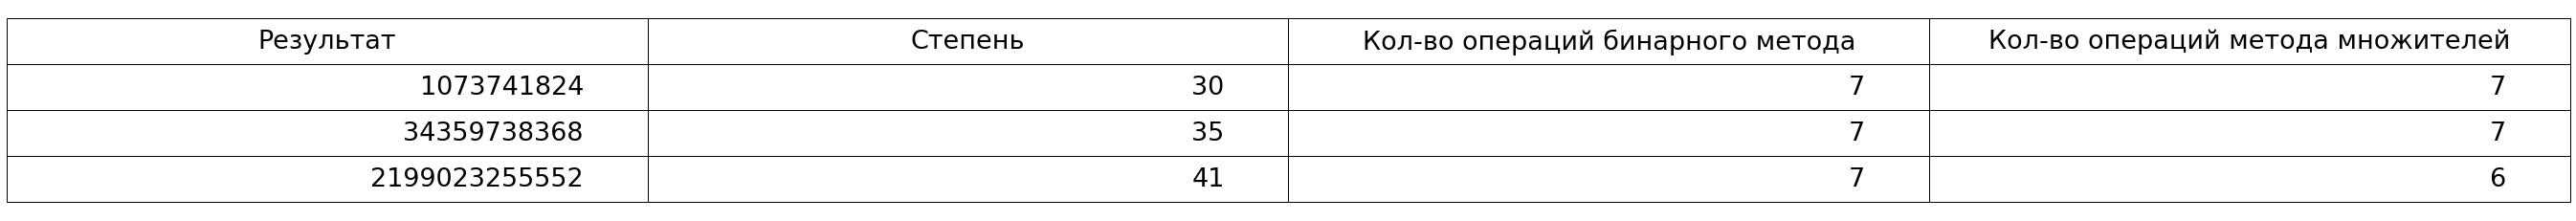

In [40]:
from matplotlib import pyplot as plt


number = 2
tableOfResults = list()
listOfPowers = (30, 35, 41)

print(f"Возводиться в степени будет число {number}")


for power in listOfPowers:
    print(f"Текущая степень, в которую возводится число - {power}")
    
    bResult, bCount, bListOfPowers = binaryMethod(number, power)
    mResult, mCount, mListOfPowers1, mListOfPowers2 = multipliersMethod(number, power)
    
    print(f"Последовательность степеней бинарного метода: {bListOfPowers}")
    print(f"[1] Последовательность степеней метода множителей: {mListOfPowers1}")
    print(f"[2] Последовательность степеней метода множителей: {mListOfPowers2}")
    print()

    tableOfResults.append((mResult, power, bCount, mCount))
    
top = ['Результат', 'Степень', 'Кол-во операций бинарного метода', "Кол-во операций метода множителей"]

table = plt.table(tableOfResults, rowLoc='right', colLabels=top, loc='center')
table.set_fontsize(35)
table.scale(8, 4) 
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

**Вывод**: из сравнительной таблицы видно, что бинарный метод лишь изредка уступает методу множителей по количеству операций.

# Алгоритм Брауэра
Был реализован алгоритм Брауэра, его реализация представлена ниже

In [19]:
def algorithmBrauer(number: int, k: int, chain: List[int] = []) -> None:
    d = 2 ** k

    if number < d:
        chain.extend([i for i in range(1, d) if i not in chain])
    else:
        q = number // d
        algorithmBrauer(q, k, chain)
        chain.extend([i * q for i in range(2, d + 1, 2) if i * q not in chain])

    if number not in chain:
        chain.append(number)

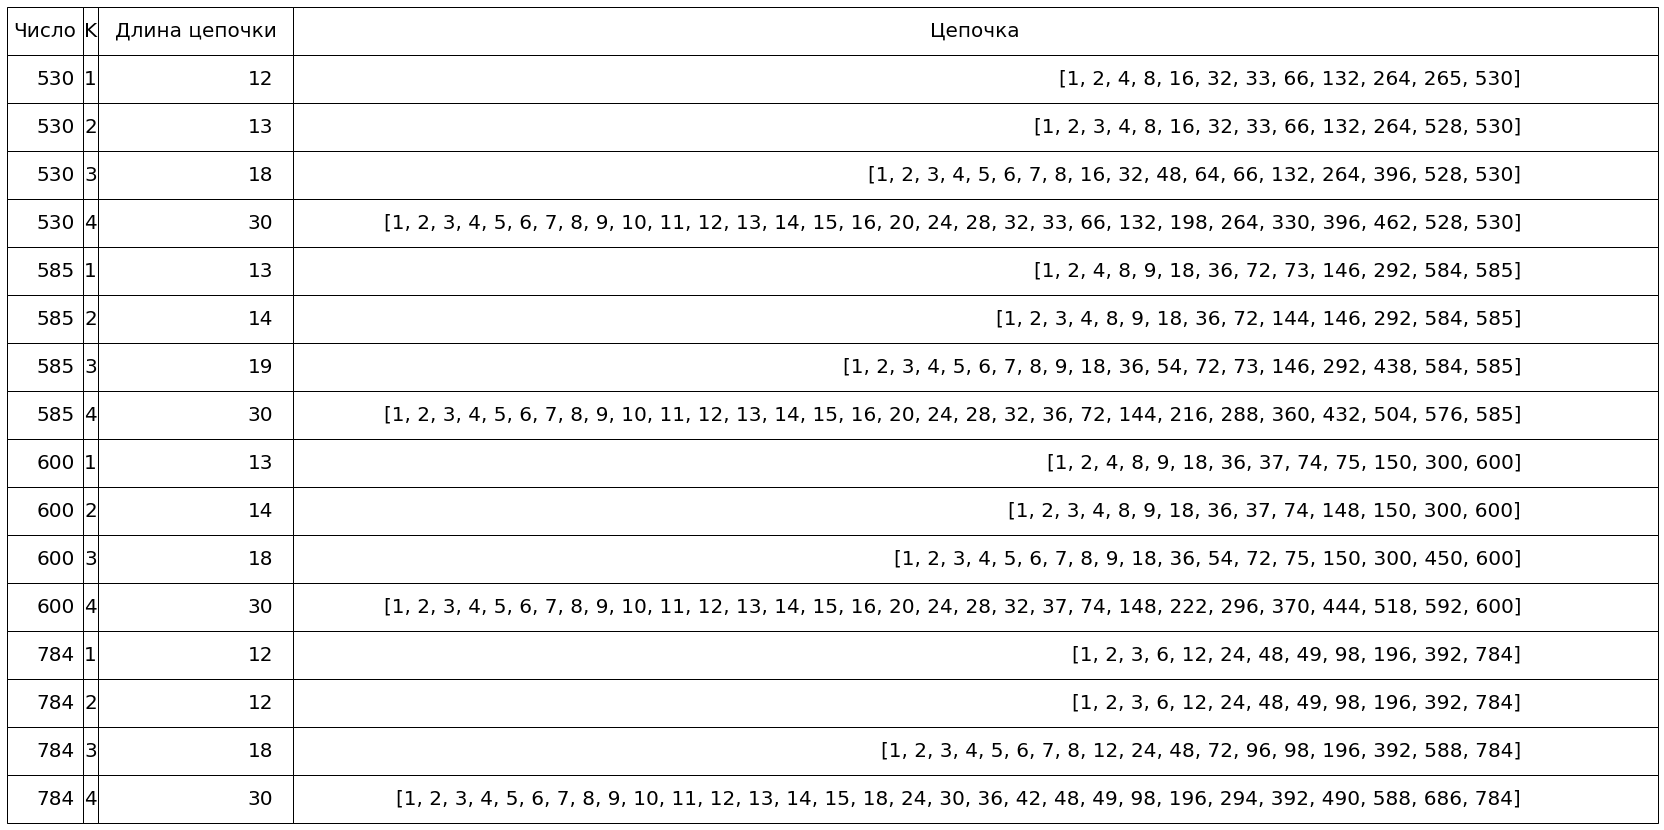

In [20]:
numbersForAlgorithm = (530, 585, 600, 784)
rangeOfVariable = list(range(1, 5))

tableOfExperiment = list()
for number in numbersForAlgorithm:
    for k in rangeOfVariable:
        brauerChain = list()
        algorithmBrauer(number, k, brauerChain)
        tableOfExperiment.append([number, k, len(brauerChain), brauerChain])
    
top = ["Число", "K", "Длина цепочки", "Цепочка"]

table = plt.table(tableOfExperiment, rowLoc='right', colLabels=top, loc='center')

table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(4)))
table.set_fontsize(20)
table.scale(2, 4) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

**Вывод**: Добиться минимальной аддитивной цепочки можно при $k = \lambda(\lambda(n))$, в ином случае результат будет отличаться, а при увеличении $k$ результат будет ухудшаться.

# Алгоритм дробления вектора индексов  
Был реализован алгоритм дробления ВИ для получения ЗЦ. Полученный результат представлен ниже.

In [36]:
from math import log
from typing import List, Optional
from time import time


def getBinaryRecord(number: int) -> str:
    return bin(number)[2:]


def getMinimalVector(length: int) -> List[int]:
    return [1] * length


def getMaximumVector(length: int, q: int) -> List[int]:
    return [i + q for i in range(1, length + 1)]


def getHammingDistance(number: int) -> int:
    return getBinaryRecord(number).count("1")


def decrementVectorIndexes(vectorIndexes: List[int], q: int):
    reversedVectorIndexes = vectorIndexes[::-1]
    indexOfHigherValue = -1

    for index, value in enumerate(reversedVectorIndexes):
        if value > 1:
            indexOfHigherValue = index
            break

    if indexOfHigherValue == -1:
        return

    indexOfHigherValue = len(vectorIndexes) - indexOfHigherValue - 1
    vectorIndexes[indexOfHigherValue] -= 1

    for index in range(indexOfHigherValue + 1, len(vectorIndexes)):
        vectorIndexes[index] = index + q + 1


def getStarChain(vectorIndexes: List[int]):
    chain = [1]
    for index in vectorIndexes:
        chain.append(chain[-1] + chain[index - 1])
    return chain


def isMinimalVector(vectorIndexes: List[int]) -> bool:
    return all(index == 1 for index in vectorIndexes)


def getMinimalStarChain(number: int) -> Optional[List[int]]:
    start = int(log(number, 2))
    end = start + getHammingDistance(number)

    for m in range(start, end):
        q = m // 2 or 1
        vectorIndexes = [i for i in range(1, q + 1)]
        mutableVectorLength = m - q

        while not isMinimalVector(vectorIndexes):
            maxMutableVector = getMaximumVector(mutableVectorLength, q)
            minMutableVector = getMinimalVector(mutableVectorLength)

            minStarChain = getStarChain(vectorIndexes + minMutableVector)
            maxStarChain = getStarChain(vectorIndexes + maxMutableVector)

            lastElementOfMinChain = minStarChain[-1]
            lastElementOfMaxChain = maxStarChain[-1]

            if lastElementOfMinChain == number:
                return minStarChain

            if lastElementOfMaxChain == number:
                return maxStarChain

            if lastElementOfMinChain < number < lastElementOfMaxChain:

                while not isMinimalVector(maxMutableVector):
                    decrementVectorIndexes(maxMutableVector, q)
                    currentStarChain = getStarChain(vectorIndexes + maxMutableVector)
                    lastElementOfCurrentChain = currentStarChain[-1]
                    if lastElementOfCurrentChain == number:
                        return currentStarChain

            decrementVectorIndexes(vectorIndexes, 0)

    return getStarChain(vectorIndexes)

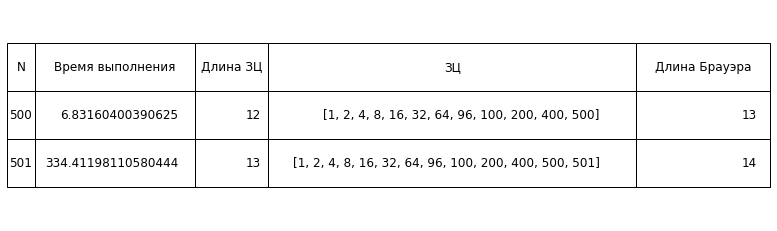

In [30]:
from time import time

numbersForAlgorithm = (500, 501)
rangeOfVariable = list(range(1, 5))

tableOfExperiment = list()

for number in numbersForAlgorithm:
    
    startOfStarChain = time()
    starChain = getMinimalStarChain(number)
    endOfStarChain = time()
    resultTime = endOfStarChain - startOfStarChain
    
    brauerChains = list()
    
    for k in rangeOfVariable:
        brauerChain = list()
        algorithmBrauer(number, k, brauerChain)
        brauerChains.append(brauerChain)
    
    minimalBrauerChain = min(brauerChains, key=lambda chain: len(chain))
    tableOfExperiment.append([number, resultTime, len(starChain), starChain, len(minimalBrauerChain)])
    
top = ["N", "Время выполнения", "Длина ЗЦ", "ЗЦ", "Длина Брауэра"]

table = plt.table(tableOfExperiment, rowLoc='right', colLabels=top, loc='center')

table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(4)))
table.set_fontsize(12)
table.scale(2, 4) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

**Вывод**: Алгоритм ВИ на выходе предоставляет минимальную аддитивную цепочку. В то же время алгоритм Брауэра отличается от алгоритма ВИ цепочками большего размера, но время работы алгоритма ВИ чрезвычайно высокое, тогда как алгоритм Брауэра работает намного эффективнее.

# Проверка следствия теоремы Брауэра 

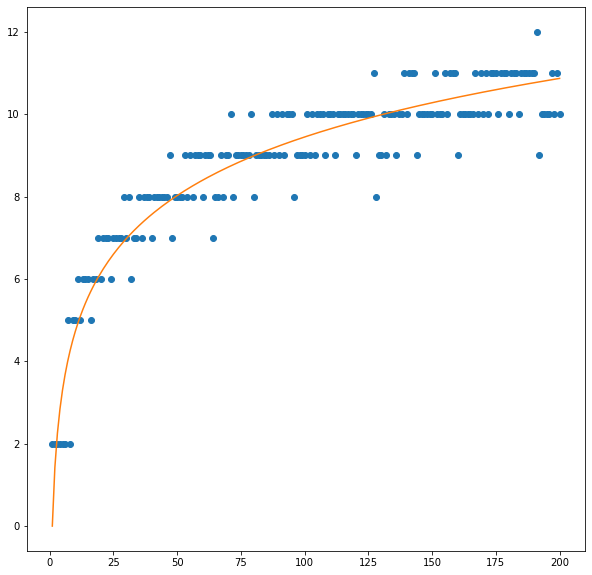

In [38]:
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
import numpy


def model(t, coeffs):
    return numpy.log(t) * coeffs[0]


def residuals(coeffs, y, t):
    return y - model(t, coeffs)


fromValue = 1
toValue = 201

values = [i for i in range(fromValue, toValue)]
results = [len(getMinimalStarChain(value)) for value in values]

_, _ = plt.subplots(figsize=(10, 10))
p, _ = leastsq(residuals, 1, args=(results, values))
plt.plot(values, results, 'o', values, model(values, p))
plt.show()

**Вывод**: Анализируя график, можно сделать вывод о том, что длины аддитвиных цепочек аппроксимируются логарифмической кривой. Таким образом, подтверждается следствие теоремы Брауэра.

# Проверка гипотезы Шольца - Брауэра
С помощью алгоритма дробления ВИ была проверена гипотеза Шольца-Брауэра.

| $n$ | $l^*(2^n - 1)$ | $l^*(n) + n - 1$ |
| :-: | :-: | :-: |
| 2 | 3 | 3 | 
| 3 | 5 | 5 |
| 4 | 6 | 6 |
| 5 | 8 | 8 |
| 6 | 9 | 9 |
| 7 | 11 | 11 |
| 8 | 11 | 11 |
| 9 | 13 | 13 |
| 10 | 14 | 14 |

**Вывод**: Гипотеза достоверна для проверенных чисел. Используя данную гипотезу, можно сократить время работы алгоритма нахождения минимальной аддитивной цепочки, так как будут известны примерные размеры цепочки.

# Общий вывод  
Было сформировано представление об аддитивных цепочках, выработано умение составлять и применять алгоритмы для нахождения минимальных аддитивиных цепочек для заданного числа, был привит навык использования систем компьютерной алгебры для реализации алгоритмов.
Были составлены алгоритмы для возведения числа в степень: бинарный и метод множителей. Были реализованы алгоритмы Брауэра и дробления вектора индексов для нахождения минимальных аддитивных цепочек. Метод Брауэра работал значительно эффективнее, чем алгоритм дробления вектора индексов, но в то же время погрешность его использования была довольно велика. Алгоритм дробления ВИ работает гораздо точнее, чем алгоритм Брауэра. Было проверено следствие теоремы Брауэра и гипотеза Шольца-Брауэра.